In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline


file = r"amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(file)

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [3]:
frequency_categories = df["category"].value_counts()

proportion_categories = df["category"].value_counts(normalize=True)

frequency_categories,proportion_categories

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
                                            ...  
 Alexa Built-In Devices                       107
 Motorbike Chassis                            107
 Plugs                                        107
 Smart Home Security & Lighting               104
 Smart Speakers                                54
 Name: count, Length: 296, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
                                             ...   
 Alexa Built-In Devices                    0.000044
 Motorbike Chassis       

In [4]:
# TOP 5 categories

top_5_categories = frequency_categories.head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

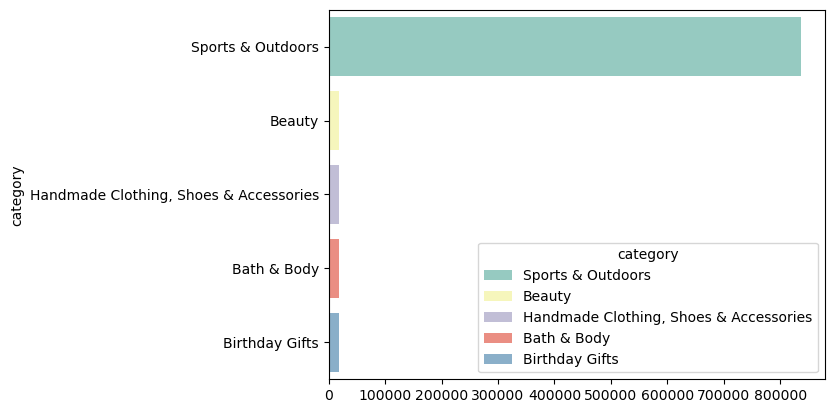

In [5]:
#dataviz

cat = sns.barplot(x=top_5_categories.values , y=top_5_categories.index, palette="Set3", hue=top_5_categories.index, legend="full");
sns.move_legend(cat, "lower right");


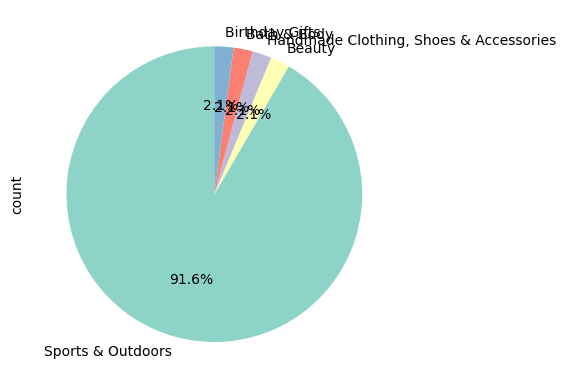

In [6]:
top_5_categories.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("Set3"));

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [7]:
#1
prices = df['price']

print(prices.value_counts())

mean_price = prices.mean()
median_price = prices.median()
mode_price = prices.mode() 

print(f"avg price : {mean_price} \n median price : {median_price} \n most common price : {mode_price}")

price
9.99       48922
12.99      38823
8.99       34058
7.99       33632
14.99      32570
           ...  
2398.99        1
1453.08        1
1785.63        1
1347.36        1
317.34         1
Name: count, Length: 82916, dtype: int64
avg price : 89.24380943923663 
 median price : 19.09 
 most common price : 0    9.99
Name: price, dtype: float64


In [8]:
#2
variance_price = prices.var()
std_price = prices.std()
min_price = prices.min()
max_price = prices.max()
range_price = max_price - min_price
quantile_price = prices.quantile([0.25,0.5,0.75])

print(f"variance : {variance_price} \n std : {std_price} \n min : {min_price} \n max : {max_price} \n range : {range_price} \n quantile : {quantile_price} ")



variance : 119445.48532256528 
 std : 345.60886175352226 
 min : 0.0 
 max : 100000.0 
 range : 100000.0 
 quantile : 0.25     9.99
0.50    19.09
0.75    45.99
Name: price, dtype: float64 


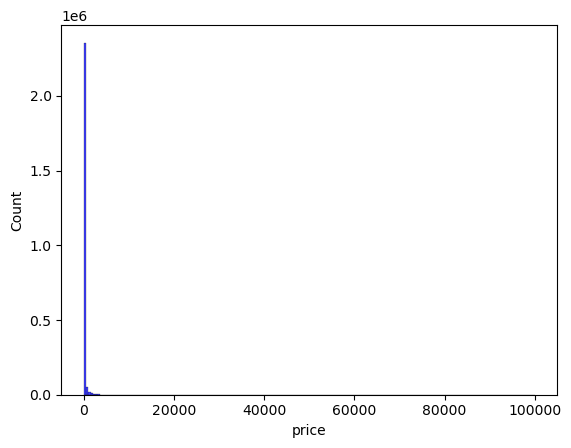

In [10]:
#3

sns.histplot(prices, bins=200, color="blue");



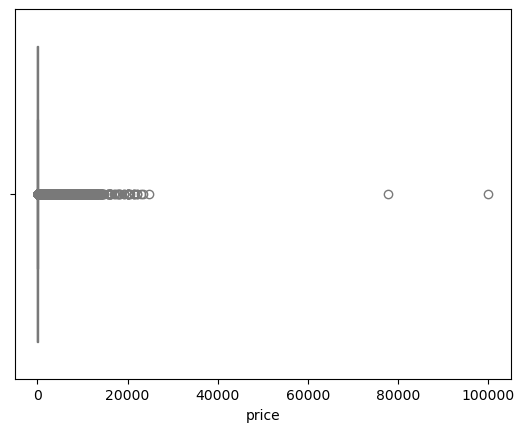

In [11]:
#3
sns.boxplot(x=prices, color='lightblue');

In [12]:
skewed_price = prices.skew()
kurtosis_price = prices.kurtosis()

print(f" highly positive skewness : {skewed_price} \n very long tail kurtosis : {kurtosis_price}")

 highly positive skewness : 27.492977566280338 
 very long tail kurtosis : 4241.616412866518


### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

---

**Submission**: Submit a Jupyter Notebook which contains code and a business-centric report summarizing your findings. 

In [13]:
#3
#df.head()
ratings = df["stars"]

mean_rate = ratings.mean()
median_rate = ratings.median()
mode_rate = ratings.mode()

print(f" avg rate : {mean_rate} \n median : {median_rate} \n most common rate : {mode_rate} ")
#the average rate of products are very low, maybe most of the values ​​in the table are not filled in and replaced by 0


 avg rate : 2.152836472966065 
 median : 0.0 
 most common rate : 0    0.0
Name: stars, dtype: float64 


In [14]:
#3
variance_rate = ratings.var()
std_rate = ratings.std()
quantile_rate = ratings.quantile([0.25,0.5,0.75])

print(f" variance : {variance_rate} \n std : {std_rate} \n quantile : {quantile_rate}")
#there is very little variance in the ratings because if we look at the quantiles we notice that it is only from 0.75 that we obtain a rate(4.4)

 variance : 4.81743402976196 
 std : 2.1948653785054697 
 quantile : 0.25    0.0
0.50    0.0
0.75    4.4
Name: stars, dtype: float64


In [15]:
#3
skew_rate = ratings.skew()
kurto_rate = ratings.kurtosis()

print(f" positive skew : {skew_rate},  negative kurtosis : {kurto_rate}")



 positive skew : 0.08120735761080985,  negative kurtosis : -1.9260061280432985


<Axes: xlabel='stars', ylabel='Count'>

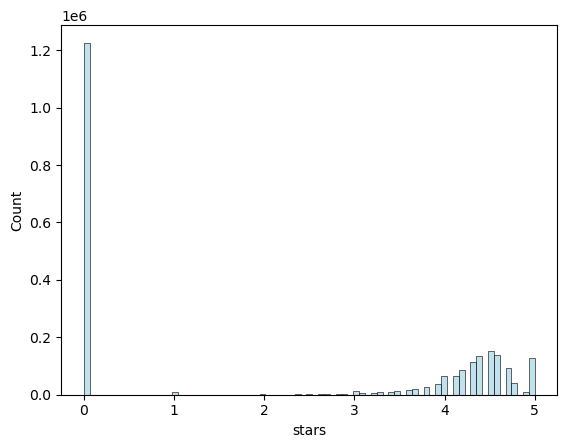

In [16]:
#3

sns.histplot(ratings, color="lightblue")